# Transformasi Data "World Happiness Report"

**Nama**  : Difta Alzena Sakhi  
**NPM**   : 23083010061  
**Kelas** : Analisis Eksploratif Data (EDA) - A  

**Tentang Dataset**:  
Dataset Kebahagiaan Dunia (World Happiness Report) ini mengevaluasi tingkat kebahagiaan di 155 negara berdasarkan data dari Gallup World Poll. Survei ini menggunakan *Cantril ladder* untuk mengukur kebahagiaan, di mana responden diminta untuk menilai kehidupan mereka pada skala 0 (terburuk) hingga 10 (terbaik). Hasil laporan ini dimanfaatkan oleh pemerintah dan organisasi untuk memahami faktor-faktor yang mempengaruhi kesejahteraan masyarakat serta menjadi acuan dalam penyusunan kebijakan. Beberapa faktor yang diukur dalam dataset ini meliputi: 

- **Country**: Nama negara.
- **Region**: Wilayah tempat negara tersebut berada.
- **Happiness Rank**: Peringkat kebahagiaan negara.
- **Happiness Score**: Skor kebahagiaan yang diberikan berdasarkan hasil survei.
- **Economy (GDP per Capita)**: Indikator ekonomi yang mencerminkan pendapatan per kapita.
- **Family**: Faktor yang mencakup dukungan keluarga dan hubungan sosial.
- **Health (Life Expectancy)**: Indikator kesehatan masyarakat, diukur melalui harapan hidup.
- **Freedom**: Tingkat kebebasan yang dirasakan oleh individu untuk membuat pilihan hidup.
- **Trust (Government Corruption)**: Tingkat kepercayaan terhadap pemerintah dan persepsi korupsi.
- **Generosity**: Indikator kemurahan hati masyarakat, diukur dari sumbangan dan dukungan sosial. 

### MENYIAPKAN DATA

In [81]:
import pandas as pd

# Memuat data file ke dalam DataFrame:
df_2015 = pd.read_excel(r'C:\Users\Difta Alzena\OneDrive\ドキュメント\World Happiness Report_EDA - Copy.xlsx')

# Menampilkan beberapa baris DataFrame
df_2015.head() 

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,Denmark,Western Europe,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,Norway,Western Europe,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,Canada,North America,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811


## A. MISSING VALUES

### Memeriksa Missing Values

In [82]:
# Memeriksa nilai yang hilang
missing_values = df_2015.isnull().sum()

# Menampilkan jumlah missing values untuk setiap kolom
print(missing_values)

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
dtype: int64


Hasil ini menunjukkan bahwa tidak ada data yang hilang dalam dataset Kebahagiaan Dunia (World Happiness Report) untuk semua kolom. Setiap kolom, termasuk `Country`, `Region`, `Happiness Rank`, `Happiness Score`, `Economy (GDP per Capita)`, `Family`, `Health (Life Expectancy)`, `Freedom`, `Trust (Government Corruption)`, dan `Generosity`, memiliki jumlah missing values yang sama dengan nol. Ini berarti bahwa dataset lengkap dan siap untuk analisis lebih lanjut tanpa perlu mengatasi masalah missing values.


### Membuat Dummy Variabel

In [8]:
# Menampilkan nama kolom pada DataFrame df_2015
print(df_2015.columns)

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity'],
      dtype='object')


In [13]:
# Menampilkan nilai unik di kolom 'Country'
unique_regions = df_2015['Country'].unique()
print(f"Nilai unik di kolom 'Country '':\n{unique_regions}")

Nilai unik di kolom 'Country '':
['Switzerland' 'Iceland' 'Denmark' 'Norway' 'Canada' 'Finland'
 'Netherlands' 'Sweden' 'New Zealand' 'Australia' 'Israel' 'Costa Rica'
 'Austria' 'Mexico' 'United States' 'Brazil' 'Luxembourg' 'Ireland'
 'Belgium' 'United Arab Emirates' 'United Kingdom' 'Oman' 'Venezuela'
 'Singapore' 'Panama' 'Germany' 'Chile' 'Qatar' 'France' 'Argentina'
 'Czech Republic' 'Uruguay' 'Colombia' 'Thailand' 'Saudi Arabia' 'Spain'
 'Malta' 'Taiwan' 'Kuwait' 'Suriname' 'Trinidad and Tobago' 'El Salvador'
 'Guatemala' 'Uzbekistan' 'Slovakia' 'Japan' 'South Korea' 'Ecuador'
 'Bahrain' 'Italy' 'Bolivia' 'Moldova' 'Paraguay' 'Kazakhstan' 'Slovenia'
 'Lithuania' 'Nicaragua' 'Peru' 'Belarus' 'Poland' 'Malaysia' 'Croatia'
 'Libya' 'Russia' 'Jamaica' 'North Cyprus' 'Cyprus' 'Algeria' 'Kosovo'
 'Turkmenistan' 'Mauritius' 'Hong Kong' 'Estonia' 'Indonesia' 'Vietnam'
 'Turkey' 'Kyrgyzstan' 'Nigeria' 'Bhutan' 'Azerbaijan' 'Pakistan' 'Jordan'
 'Montenegro' 'China' 'Zambia' 'Romania' 'Ser

In [11]:
# Menampilkan nilai unik di kolom 'Region'
unique_regions = df_2015['Region'].unique()
print(f"Nilai unik di kolom 'Region':\n{unique_regions}")

Nilai unik di kolom 'Region':
['Western Europe' 'North America' 'Australia and New Zealand'
 'Middle East and Northern Africa' 'Latin America and Caribbean'
 'Southeastern Asia' 'Central and Eastern Europe' 'Eastern Asia'
 'Sub-Saharan Africa' 'Southern Asia']


Kolom-kolom yang bisa dibuat dummy variabel dari data saya adalah `Region` dan `Country`, karena keduanya merupakan data kategorikal. Namun, saya memutuskan untuk mengambil `Region` sebagai dummy variabel. Alasan saya memilih `Region` adalah karena memiliki jumlah kategori yang lebih sedikit dibandingkan `Country` sehingga hasilnya lebih efisien dan tidak terlalu banyak menghasilkan kolom baru. Selain itu, `Region` lebih relevan untuk analisis yang saya lakukan karena saya ingin melihat perbedaan antarwilayah yang lebih luas, bukan berdasarkan negara spesifik.

In [17]:
# Menampilkan nilai unik dan jumlah baris per Region
print("Nilai unik di kolom 'Region' dan jumlah baris masing-masing:\n")
region_counts = df_2015['Region'].value_counts()
print(region_counts)

# Menampilkan baris pertama yang unik berdasarkan kolom 'Region'
print("\nBaris pertama yang unik berdasarkan kolom 'Region':\n")
unique_rows_region = df_2015.drop_duplicates(subset=['Region'])
print(unique_rows_region[['Region']])

Nilai unik di kolom 'Region' dan jumlah baris masing-masing:

Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64

Baris pertama yang unik berdasarkan kolom 'Region':

                             Region
0                    Western Europe
4                     North America
8         Australia and New Zealand
10  Middle East and Northern Africa
11      Latin America and Caribbean
23                Southeastern Asia
30       Central and Eastern Europe
37                     Eastern Asia
70               Sub-Saharan Africa
78                    Southern Asia


Sebelum membuat dummy variabel, saya terlebih dahulu menganalisis kolom `Region` dalam dataset ini. Terdapat banyak nilai unik, dengan jumlah baris yang bervariasi,  misalnya, `Sub-Saharan Africa` memiliki 40 entri, sementara `North America` dan `Australia and New Zealand` masing-masing hanya memiliki 2 entri. Saya juga menampilkan baris pertama yang unik berdasarkan kolom `Region` untuk menunjukkan sebaran wilayah. 

Selanjutnya, saya akan melakukan dummy variabel pada `Region` sehingga setiap kategori wilayah akan diwakili oleh kolom terpisah dengan nilai 0 atau 1.

In [3]:
# Menggunakan pd.get_dummies() untuk kolom 'Region'
dummies_region = pd.get_dummies(df_2015['Region'], prefix='Region')

# Konversi nilai menjadi tipe integer
dummies_region = dummies_region.astype(int)

# Menampilkan dummy variables yang baru
dummies_region

,Region_Australia and New Zealand,Region_Central and Eastern Europe,Region_Eastern Asia,Region_Latin America and Caribbean,Region_Middle East and Northern Africa,Region_North America,Region_Southeastern Asia,Region_Southern Asia,Region_Sub-Saharan Africa,Region_Western Europe
0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
153,0,0,0,0,0,0,0,0,1,0
154,0,0,0,0,0,0,0,0,1,0
155,0,0,0,0,1,0,0,0,0,0
156,0,0,0,0,0,0,0,0,1,0


Dalam analisis ini, saya menggunakan `pd.get_dummies()` untuk mengonversi kolom `Region` menjadi dummy variabel. Setiap kategori wilayah akan menjadi kolom terpisah dengan nama yang diawali dengan "Region", dan nilai dalam kolom tersebut akan berupa 0 atau 1, yang menunjukkan keberadaan kategori tersebut. Nilai 1 menunjukkan bahwa baris tersebut termasuk dalam kategori tertentu, sementara nilai 0 menunjukkan sebaliknya.

## B. OUTLIER

### Memeriksa Outlier

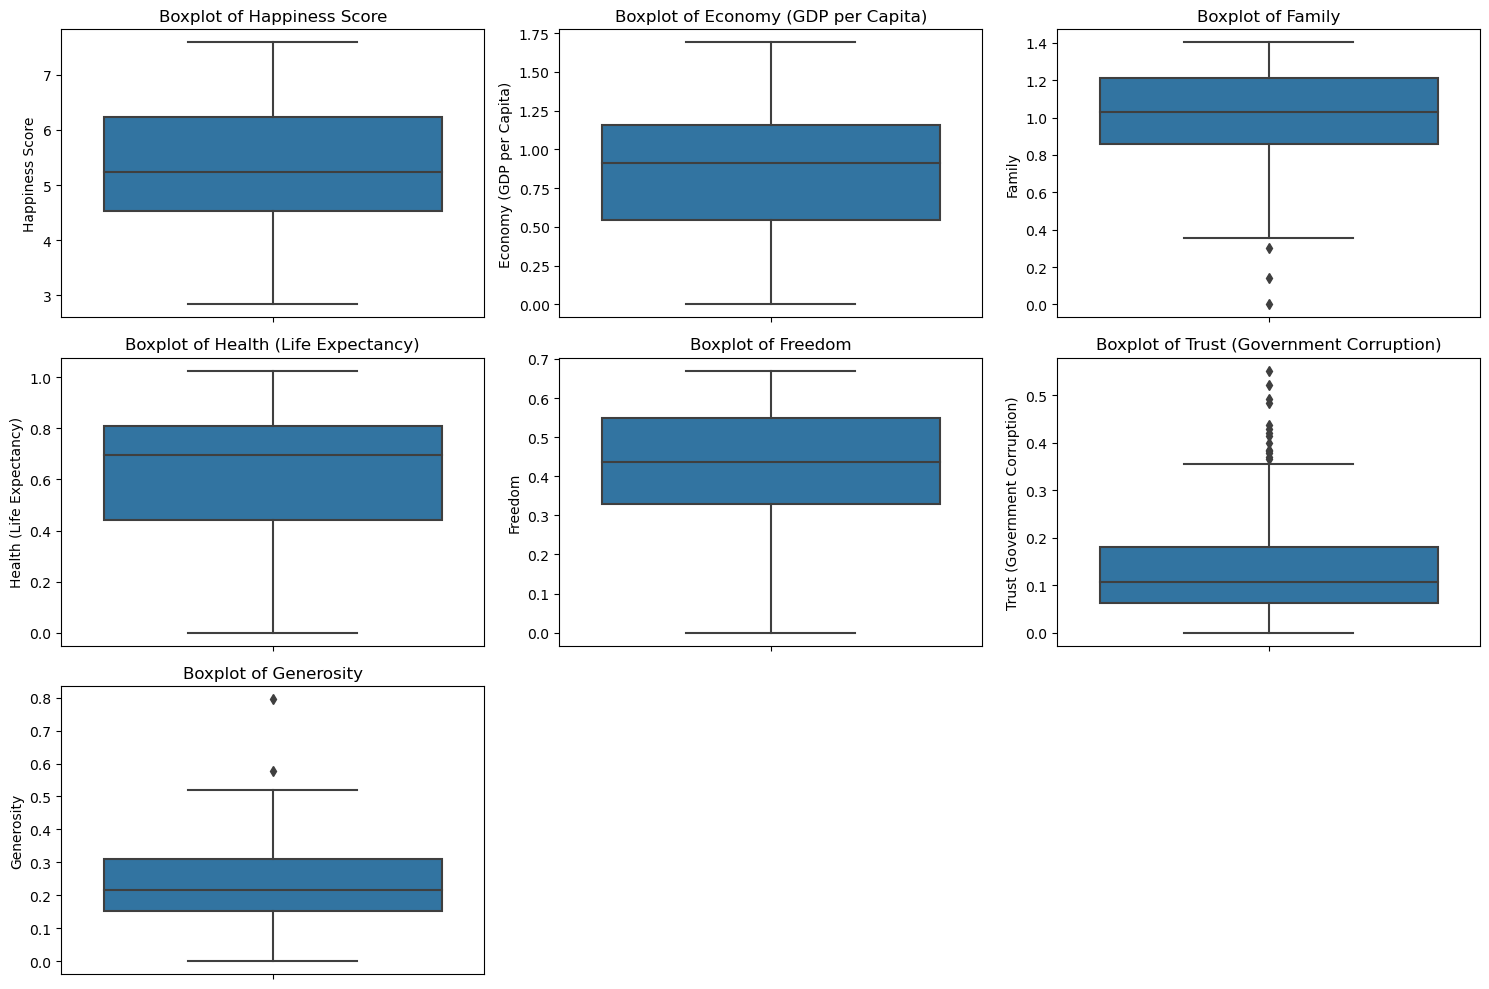

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# List variabel numerik yang akan divisualisasikan
numerical_columns = [
    'Happiness Score', 
    'Economy (GDP per Capita)', 
    'Family', 
    'Health (Life Expectancy)', 
    'Freedom', 
    'Trust (Government Corruption)', 
    'Generosity'
]

# Membuat boxplot untuk setiap variabel
plt.figure(figsize=(15, 10))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=df_2015, y=column)
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

Dalam analisis ini, saya membuat boxplot untuk beberapa variabel numerik dalam dataset, yaitu `Happiness Score`, `Economy (GDP per Capita)`, `Family`, `Health (Life Expectancy)`, `Freedom`, `Trust (Government Corruption)`, dan `Generosity`. Fokus utama dari boxplot ini adalah untuk mengidentifikasi outlier, yaitu nilai-nilai yang jauh dari kebanyakan data. Selain itu, boxplot juga memungkinkan saya untuk melihat median dan kuartil dari setiap variabel.

Dari hasil boxplot, saya mengamati bahwa terdapat outlier pada kolom `Family`, di mana nilai outliernya berada di bawah rentang data utama, menunjukkan bahwa ada beberapa negara dengan nilai dukungan sosial atau keakraban keluarga yang berpengaruh pada kebahagiaan yang sangat rendah. Sementara itu, untuk kolom `Trust (Government Corruption)` dan `Generosity`, outlier terdeteksi di atas, yang menunjukkan adanya negara dengan tingkat kepercayaan dan kemurahan hati yang jauh lebih tinggi dibandingkan dengan yang lain. 

### Mengatasi Outlier

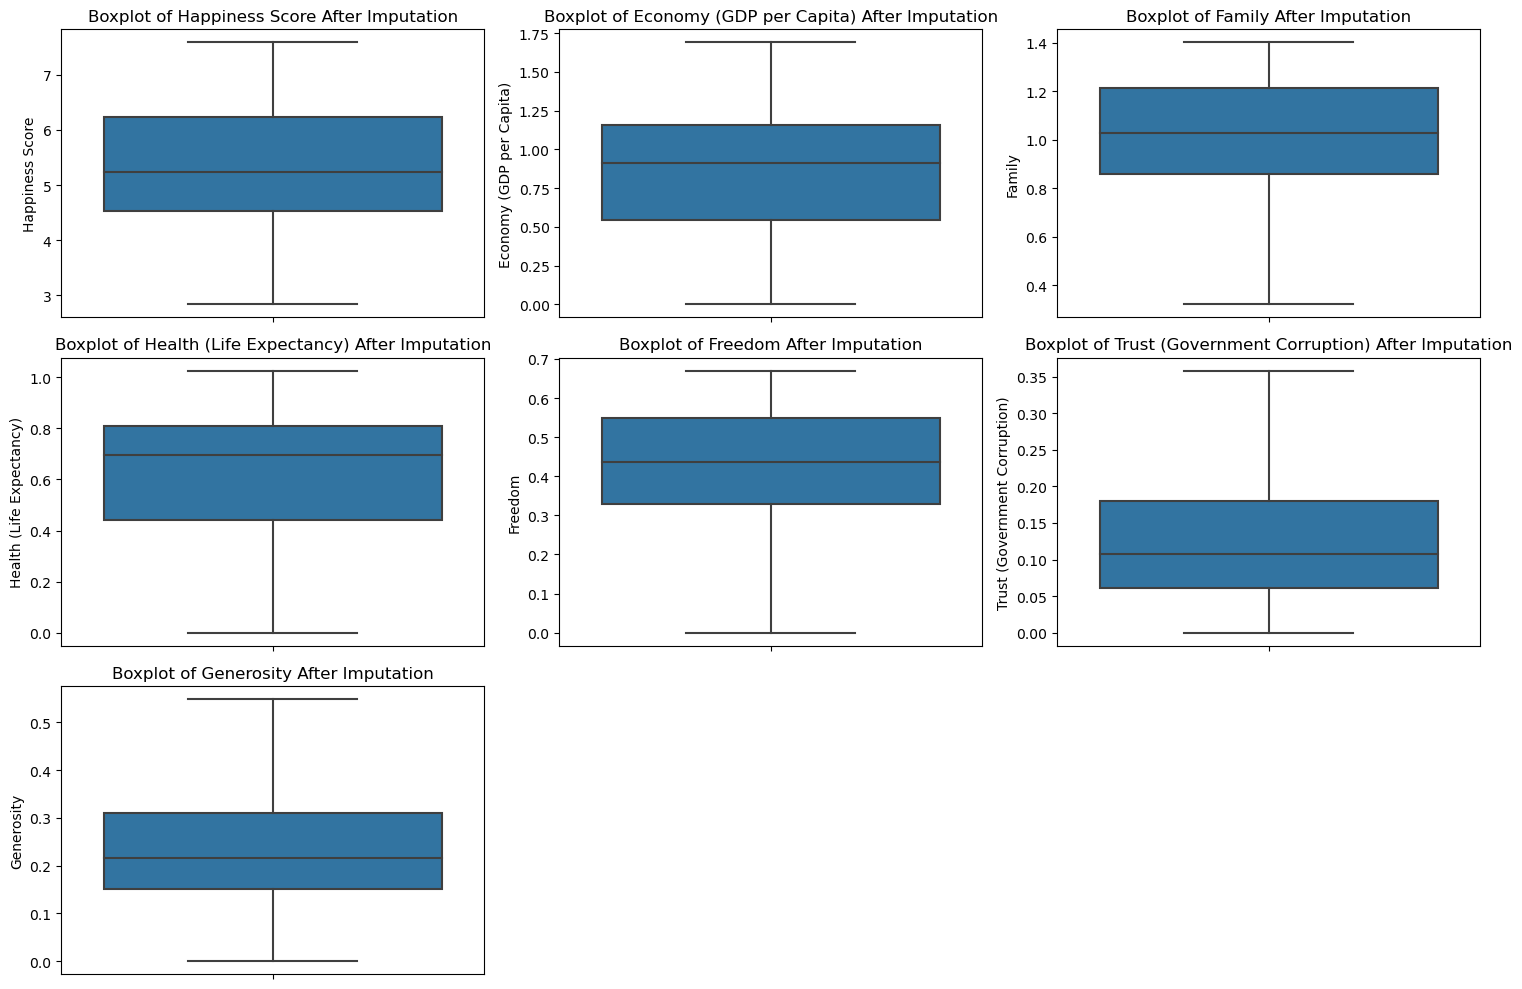

In [4]:
import pandas as pd

# Menghitung IQR dan batas bawah serta batas atas
def replace_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Ganti outlier
    df[column] = df[column].where(df[column] <= upper_bound, upper_bound)  # Ganti dengan batas atas
    df[column] = df[column].where(df[column] >= lower_bound, lower_bound)  # Ganti dengan batas bawah
    
    return df

# Imputasi outlier pada kolom Family, Trust, dan Generosity
df_2015 = replace_outliers_iqr(df_2015, 'Family')
df_2015 = replace_outliers_iqr(df_2015, 'Trust (Government Corruption)')
df_2015 = replace_outliers_iqr(df_2015, 'Generosity')

# Tampilkan boxplot setelah imputasi untuk memverifikasi
plt.figure(figsize=(15, 10))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=df_2015, y=column)
    plt.title(f'Boxplot of {column} After Imputation')

plt.tight_layout()
plt.show()

Dalam analisis ini, saya melakukan imputasi outlier pada kolom `Family`, `Trust (Government Corruption)`, dan `Generosity` menggunakan metode Interquartile Range (IQR). Saya mulai dengan menghitung kuartil pertama (Q1) dan kuartil ketiga (Q3) untuk setiap kolom, kemudian menghitung rentang interkuartil (IQR) sebagai selisih antara Q3 dan Q1. Selanjutnya, saya menentukan batas bawah dan batas atas berdasarkan IQR.

Setelah menetapkan batas tersebut, saya mengganti nilai-nilai yang terdeteksi sebagai outlier dengan batas atas dan batas bawah yang telah dihitung. Ini dilakukan untuk memastikan bahwa nilai-nilai ekstrem tidak mempengaruhi analisis saya secara signifikan.

Untuk memverifikasi hasil imputasi ini, saya membuat boxplot lagi untuk semua variabel numerik setelah proses imputasi. Dengan boxplot yang baru, saya dapat melihat apakah outlier sudah teratasi dan bagaimana distribusi data kini terlihat lebih seimbang.

## C. TRANSFORMASI DATA

### Normalisasi dan Standarisasi

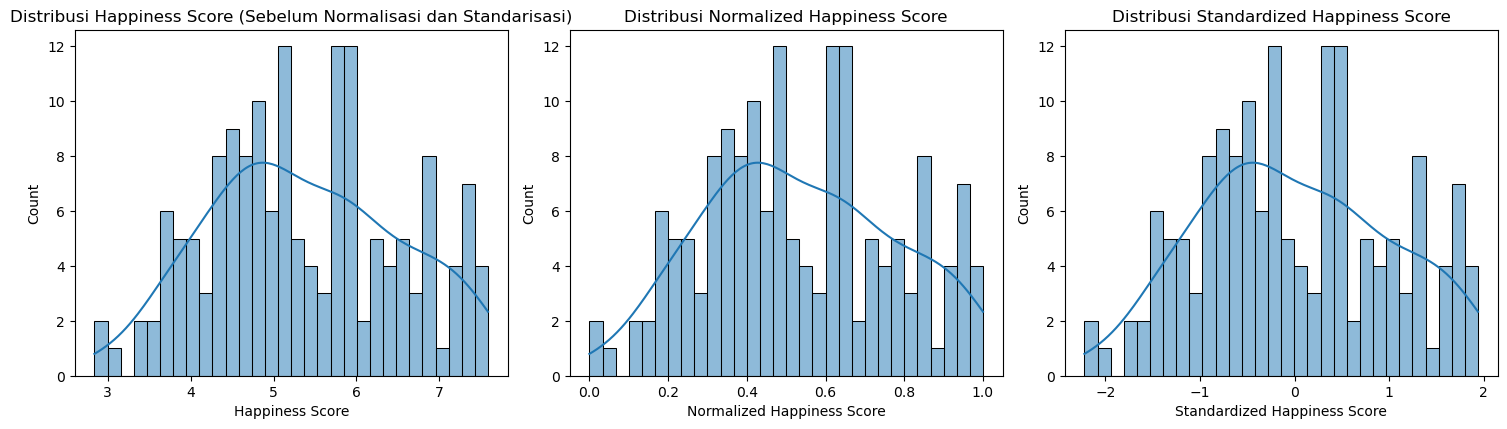

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Menggunakan MinMaxScaler untuk normalisasi
scaler = MinMaxScaler()
df_2015['Normalized Happiness Score'] = scaler.fit_transform(df_2015[['Happiness Score']])

# Menggunakan StandardScaler untuk standarisasi
standard_scaler = StandardScaler()
df_2015['Standardized Happiness Score'] = standard_scaler.fit_transform(df_2015[['Happiness Score']])

# Visualisasi sebelum dan sesudah normalisasi dan standarisasi
plt.figure(figsize=(15, 8))

# Sebelum normalisasi dan standarisasi
plt.subplot(2, 3, 1)
sns.histplot(df_2015['Happiness Score'], bins=30, kde=True)
plt.title('Distribusi Happiness Score (Sebelum Normalisasi dan Standarisasi)')

# Setelah normalisasi
plt.subplot(2, 3, 2)
sns.histplot(df_2015['Normalized Happiness Score'], bins=30, kde=True)
plt.title('Distribusi Normalized Happiness Score')

# Setelah standarisasi
plt.subplot(2, 3, 3)
sns.histplot(df_2015['Standardized Happiness Score'], bins=30, kde=True)
plt.title('Distribusi Standardized Happiness Score')

plt.tight_layout()
plt.show()

Dalam analisis ini, saya melakukan transformasi pada kolom `Happiness Score` dengan dua cara: normalisasi dan standarisasi. Pertama, saya menggunakan `MinMaxScaler` untuk normalisasi, yang mengubah nilai `Happiness Score` menjadi `Normalized Happiness Score` dalam rentang [0, 1]. Ini membuat perbandingan antar data lebih mudah dan membantu dalam analisis serta visualisasi.

Selanjutnya, saya menerapkan `StandardScaler` untuk standarisasi, yang menghasilkan `Standardized Happiness Score`, di mana data memiliki rata-rata 0 dan deviasi standar 1. Meskipun histogram menunjukkan bentuk yang sama sebelum dan sesudah transformasi, hal ini karena kedua teknik ini hanya mengubah skala atau rentang nilai, bukan distribusi data itu sendiri. Normalisasi dan standarisasi bertujuan untuk memudahkan analisis dan perbandingan data tanpa mengubah pola dasar dari data yang ada.

### Log Transformasi

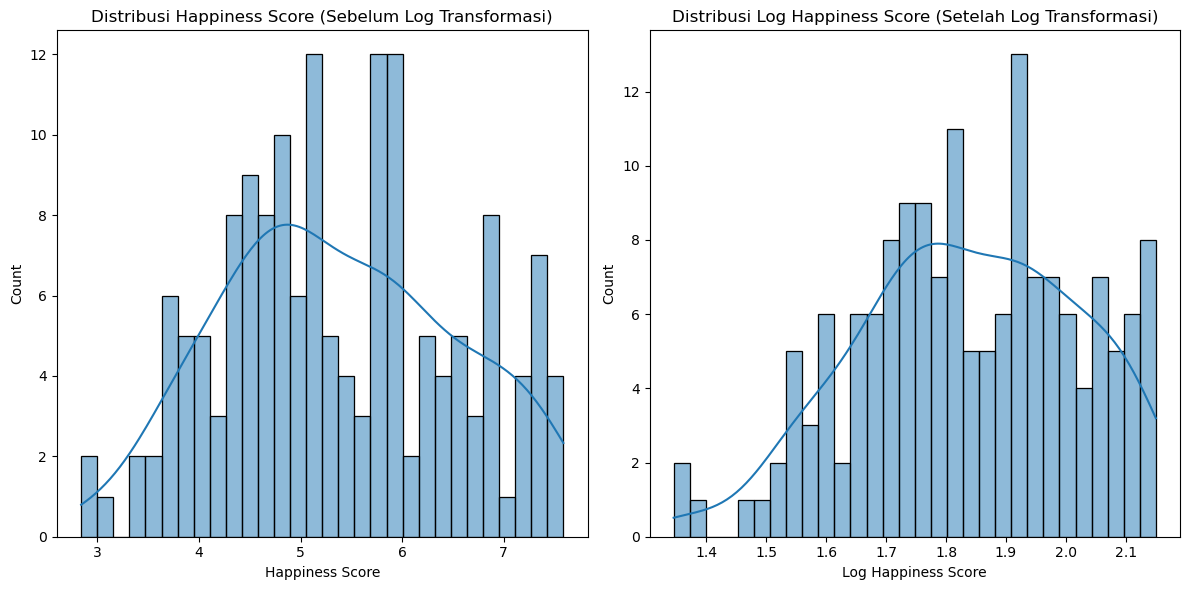

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller

# Melakukan log transformasi pada 'Happiness Score'
df_2015['Log Happiness Score'] = np.log1p(df_2015['Happiness Score'])

# Visualisasi sebelum dan sesudah log transformasi
plt.figure(figsize=(12, 6))

# Sebelum log transformasi
plt.subplot(1, 2, 1)
sns.histplot(df_2015['Happiness Score'], bins=30, kde=True)
plt.title('Distribusi Happiness Score (Sebelum Log Transformasi)')

# Setelah log transformasi
plt.subplot(1, 2, 2)
sns.histplot(df_2015['Log Happiness Score'], bins=30, kde=True)
plt.title('Distribusi Log Happiness Score (Setelah Log Transformasi)')
plt.tight_layout()
plt.show()

Dalam analisis ini, saya melakukan log transformasi pada kolom `Happiness Score` dalam dataset `df_2015` untuk mengurangi skewness dan mendekatkan distribusi data ke bentuk normal. Dengan menambahkan kolom baru, `Log Happiness Score`, yang dihitung menggunakan logaritma natural dari `Happiness Score` (ditambah 1 untuk menghindari nilai nol), dengan harapan agar dapat menghasilkan data lebih simetris. Saya kemudian memvisualisasikan hasilnya dengan histogram, membandingkan distribusi `Happiness Score` yang cenderung skewed dengan `Log Happiness Score`, yang lebih seimbang.

### Kategorisasi Variabel

In [72]:
# Menghitung kuartil
Q1 = df_2015['Happiness Score'].quantile(0.25)
Q2 = df_2015['Happiness Score'].quantile(0.50)  # Median
Q3 = df_2015['Happiness Score'].quantile(0.75)

# Mencetak nilai kuartil
print("Nilai Q1 (Kuartil Pertama):", Q1)
print("Nilai Q2 (Median):", Q2)
print("Nilai Q3 (Kuartil Ketiga):", Q3)

# Mendefinisikan fungsi untuk mengkategorikan berdasarkan kuartil
def categorize_happiness_by_quartile(score):
    if score <= Q1:
        return 'Rendah'
    elif Q1 < score <= Q2:
        return 'Sedang'
    elif Q2 < score <= Q3:
        return 'Tinggi'
    else:
        return 'Sangat Tinggi'

# Menambahkan kolom kategori berdasarkan kuartil
df_2015['Happiness Category'] = df_2015['Happiness Score'].apply(categorize_happiness_by_quartile)

# Menampilkan kolom Country, Happiness Score, dan Happiness Category
result = df_2015[['Country', 'Happiness Score', 'Happiness Category']]
result

Nilai Q1 (Kuartil Pertama): 4.526
Nilai Q2 (Median): 5.2325
Nilai Q3 (Kuartil Ketiga): 6.24375


,Country,Happiness Score,Happiness Category
0,Switzerland,7.587,Sangat Tinggi
1,Iceland,7.561,Sangat Tinggi
2,Denmark,7.527,Sangat Tinggi
3,Norway,7.522,Sangat Tinggi
4,Canada,7.427,Sangat Tinggi
...,...,...,...
153,Rwanda,3.465,Rendah
154,Benin,3.340,Rendah
155,Syria,3.006,Rendah
156,Burundi,2.905,Rendah


Dalam analisis ini, saya memilih menggunakan kuartil sebagai standar rentang untuk kategorisasi `Happiness Score` karena kuartil memberikan cara yang lebih tepat untuk memahami distribusi data. Dengan menghitung Q1, Q2, dan Q3, saya bisa melihat bagaimana data tersebar dan mengidentifikasi titik-titik kunci dalam distribusi kebahagiaan antar negara. Q1, yang menunjukkan batas bawah, menjelaskan negara-negara dengan kebahagiaan yang rendah, sedangkan Q2 dan Q3 menjelaskan tentang kelompok negara yang memiliki kebahagiaan sedang dan tinggi. Dengan pendekatan ini, saya merasa dapat menjelaskan kategori dengan lebih baik, karena setiap kategori didasarkan pada karakteristik distribusi data, bukan sekadar angka arbitrer. Juga, saya menambahkan kolom `Happiness Category`, agar lebih mudah menganalisis dan membandingkan kebahagiaan antarnegara.

In [79]:
# Mencari nilai Happiness Score tertinggi
highest_happiness_score = df_2015['Happiness Score'].max()

# Mencari negara dengan Happiness Score tertinggi
highest_country = df_2015[df_2015['Happiness Score'] == highest_happiness_score]['Country'].values[0]

# Menampilkan hasil
print("Negara dengan nilai Happiness Score tertinggi:", highest_country, "dengan skor:", highest_happiness_score)

Negara dengan nilai Happiness Score tertinggi: Switzerland dengan skor: 7.587


Sebagai tambahan, **Switzerland** adalah negara dengan nilai `Happiness Score` tertinggi, yang menunjukkan bahwa rata-rata warganya memiliki tingkat kebahagiaan yang sangat tinggi. Hal ini terkait dengan beberapa aspek penting, seperti `Economy (GDP per Capita)` yang mencerminkan kesejahteraan ekonomi, `Family` yang mencakup dukungan sosial dari keluarga, `Health (Life Expectancy)` yang menunjukkan harapan hidup yang baik, `Freedom` yang memberikan individu kebebasan dalam membuat pilihan, serta `Trust (Government Corruption)` dan `Generosity` yang menunjukkan tingkat kepercayaan masyarakat terhadap pemerintah dan sikap saling memberi dalam masyarakat.

### Penggabungan Variabel

In [78]:
# Menghitung jumlah negara per kategori
kategori_count = df_2015['Happiness Category'].value_counts()

# Membuat DataFrame baru dari hasil hitung
kategori_df = kategori_count.reset_index()
kategori_df.columns = ['Kategori', 'Jumlah Negara']

# Menampilkan tabel
kategori_df

,Kategori,Jumlah Negara
0,Sangat Tinggi,40
1,Rendah,40
2,Tinggi,39
3,Sedang,39


Dalam analisis ini, penggabungan variabel untuk menghitung jumlah negara berdasarkan kategori kebahagiaan, yakni rendah, sedang, tinggi, dan sangat tinggi. Dengan menggunakan metode `value_counts()`, saya dapat mengidentifikasi sebaran negara dalam setiap kategori. Tabel yang dihasilkan memudahkan saya untuk melihat kategori mana yang mendominasi, serta kategori yang memerlukan perhatian lebih.